# Controlled Pressure Drilling Bottom Hole Prediction During Drilling Using Machine Learning Algorithms 


In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Additionals

from pprint import pprint
from math import sqrt

In [71]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [3]:
data = pd.read_excel('WhileD.xlsx')

In [5]:
data.describe()

,MD (M),Bit Depth (M),TVD (M),BHCT (°C),Pumps (IPM),N2 Flow (m3/min),SPP (PSI),N2 Press (PSI),WHP (PSI),BHCP (PSI)
count,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000,5379.000000
mean,3834.500550,3834.500550,3423.246800,122.301564,855.408393,0.104363,1692.830918,167.668369,772.790290,3304.818133
std,267.919943,267.919943,92.009542,139.363719,51.748324,1.983332,202.977865,1292.866273,177.514384,507.462029
min,3327.469417,3327.469417,3378.660500,-9999.000000,0.000000,-5.198847,178.668733,1.287702,-289.479065,91.200000
25%,3657.723375,3657.723375,3388.585000,123.209999,834.733333,-0.215104,1593.392125,4.228967,712.070532,3403.866667
50%,3831.657750,3831.657750,3396.946000,124.180000,862.600000,-0.105916,1708.630583,14.006499,812.442752,3417.600000
75%,4066.330792,4066.330792,3406.910000,125.629997,875.451515,-0.073276,1816.407792,33.919283,868.246332,3462.399902
max,4270.361000,4270.361000,3755.304000,440.799988,927.200000,27.853917,2642.224083,15820.964483,1561.736879,3782.400000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MD (M)            5379 non-null   float64
 1   Bit Depth (M)     5379 non-null   float64
 2   TVD (M)           5379 non-null   float64
 3   BHCT (°C)         5379 non-null   float64
 4   Pumps (IPM)       5379 non-null   float64
 5   N2 Flow (m3/min)  5379 non-null   float64
 6   SPP (PSI)         5379 non-null   float64
 7   N2 Press (PSI)    5379 non-null   float64
 8   WHP (PSI)         5379 non-null   float64
 9   BHCP (PSI)        5379 non-null   float64
dtypes: float64(10)
memory usage: 420.4 KB


In [9]:
data.sample(5)

,MD (M),Bit Depth (M),TVD (M),BHCT (°C),Pumps (IPM),N2 Flow (m3/min),SPP (PSI),N2 Press (PSI),WHP (PSI),BHCP (PSI)
3743,3990.711167,3990.711167,3400.158000,122.250000,836.000000,-0.085939,1658.808667,19.782972,706.877053,3459.200000
2353,3760.099167,3760.099167,3390.641000,123.209999,874.000000,-0.078451,1720.252000,3.275067,749.325899,3392.000000
58,3335.022667,3335.022667,3749.093417,117.250000,682.733333,6.464142,881.081700,914.733398,462.835704,2699.200000
153,3351.367583,3351.367583,3736.589000,119.730003,801.800000,0.974362,1186.123917,20.763409,405.442417,3144.000000
4840,4213.744000,4213.744000,3408.421000,121.279999,832.000000,-0.215090,1773.920167,109.397189,535.650694,3491.199951


In [10]:
#duplicate data
dups = data.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(data[dups])

False
Empty DataFrame
Columns: [MD (M), Bit Depth (M), TVD (M), BHCT (°C), Pumps (IPM), N2 Flow (m3/min), SPP (PSI), N2 Press (PSI), WHP (PSI), BHCP (PSI)]
Index: []


In [11]:
df = data.copy()

In [12]:
#Find the outliers
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
   
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",df.loc[(df[col_name] < low) | (df[col_name] > high), col_name])
   
#Exclude the outliers
for col_name in df.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
   
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Exclude the Outliers = ",df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name])
    df[col_name] = df.loc[~((df[col_name] < low) | (df[col_name] > high)), col_name]

MD (M)
Outliers =  Series([], Name: MD (M), dtype: float64)
Bit Depth (M)
Outliers =  Series([], Name: Bit Depth (M), dtype: float64)
TVD (M)
Outliers =  0      3755.3040
1      3755.3040
2      3755.3040
3      3755.3040
4      3754.7235
         ...    
441    3687.4745
442    3687.3570
443    3686.6490
444    3686.2680
445    3685.8870
Name: TVD (M), Length: 446, dtype: float64
BHCT (°C)
Outliers =  0       110.309998
1       110.309998
2       110.309998
3       110.309998
4       110.309998
           ...    
4886    139.669998
4887    139.669998
4888    139.669998
5033    221.009995
5034    131.359999
Name: BHCT (°C), Length: 272, dtype: float64
Pumps (IPM)
Outliers =  0       682.733333
1       678.933333
2       672.600000
3       680.200000
4       676.400000
           ...    
4408    152.000000
4474    243.200000
4659    685.266667
4933    756.800000
4968    768.000000
Name: Pumps (IPM), Length: 121, dtype: float64
N2 Flow (m3/min)
Outliers =  0       0.826899
1       0.8444

In [13]:
df.describe()

,MD (M),Bit Depth (M),TVD (M),BHCT (°C),Pumps (IPM),N2 Flow (m3/min),SPP (PSI),N2 Press (PSI),WHP (PSI),BHCP (PSI)
count,5379.000000,5379.000000,4933.000000,5107.000000,5258.000000,4406.000000,5200.000000,4875.000000,4919.000000,5379.000000
mean,3834.500550,3834.500550,3395.734215,124.321228,860.236342,-0.149881,1708.301686,17.742227,805.032660,3304.818133
std,267.919943,267.919943,8.411399,1.692084,31.360439,0.093963,155.633418,18.690021,111.164363,507.462029
min,3327.469417,3327.469417,3378.660500,119.689170,773.933333,-0.427579,1261.472167,1.287702,478.098262,91.200000
25%,3657.723375,3657.723375,3388.303000,123.209999,836.000000,-0.190722,1604.334063,3.844750,741.270721,3403.866667
50%,3831.657750,3831.657750,3395.797000,124.180000,863.866667,-0.107995,1711.181458,11.224308,821.504822,3417.600000
75%,4066.330792,4066.330792,3402.316000,125.629997,877.778571,-0.079350,1817.107917,23.161404,871.902941,3462.399902
max,4270.361000,4270.361000,3410.159000,128.660004,927.200000,-0.035328,2150.689167,78.421742,1100.522663,3782.400000


[Text(0, 0, 'MD (M)'),
 Text(1, 0, 'Bit Depth (M)'),
 Text(2, 0, 'TVD (M)'),
 Text(3, 0, 'BHCT (°C)'),
 Text(4, 0, 'Pumps (IPM)'),
 Text(5, 0, 'N2 Flow (m3/min)'),
 Text(6, 0, 'SPP (PSI)'),
 Text(7, 0, 'N2 Press (PSI)'),
 Text(8, 0, 'WHP (PSI)'),
 Text(9, 0, 'BHCP (PSI)')]

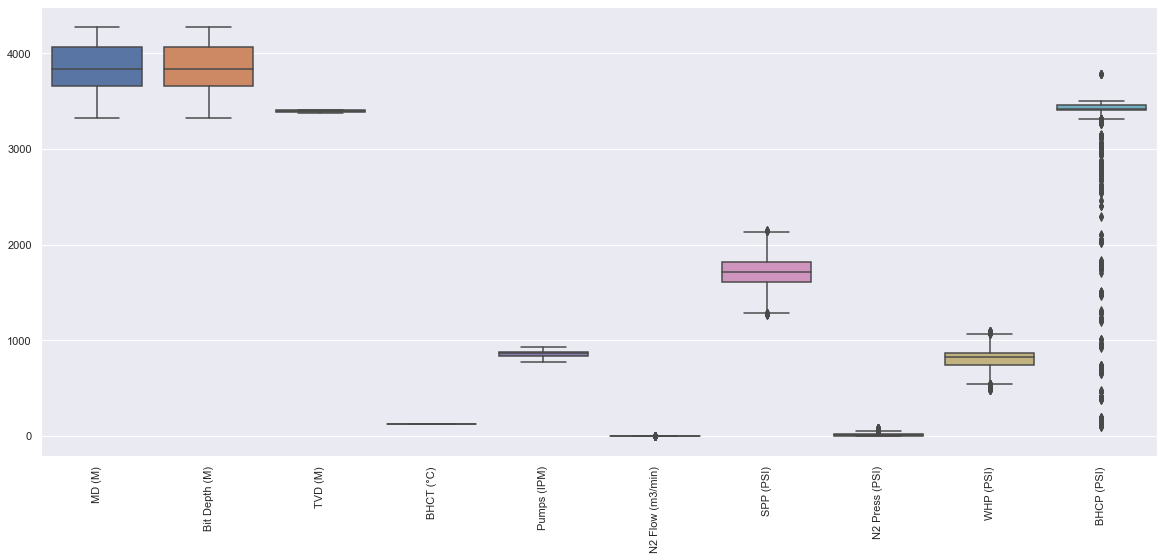

In [19]:
sns.set_theme(style="whitegrid",)
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

Text(0.5, 1.0, 'Gas Pricing Vs. Date')

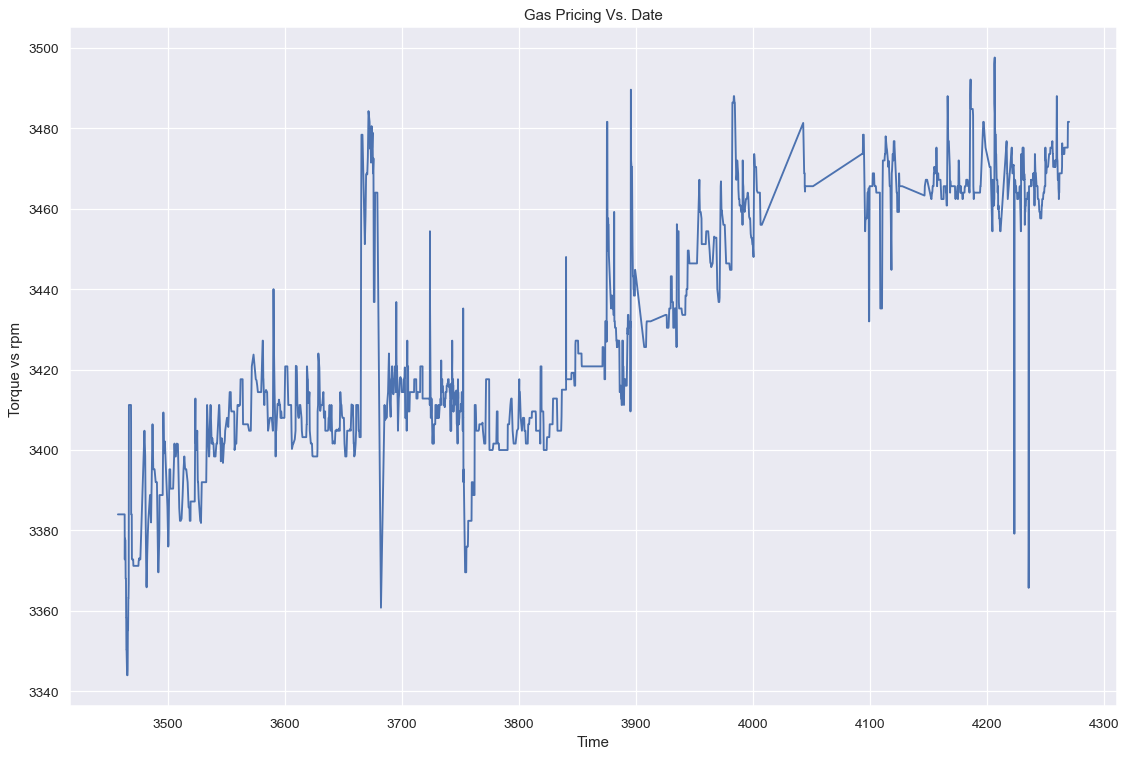

In [32]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig=plt.figure(figsize=(15,10), dpi=90)
plt.plot(df['MD (M)'],df['BHCP (PSI)'])

plt.xlabel('Time')
plt.ylabel('Torque vs rpm ')
plt.title('Gas Pricing Vs. Date')

In [28]:
df.describe()

,MD (M),Bit Depth (M),TVD (M),BHCT (°C),Pumps (IPM),N2 Flow (m3/min),SPP (PSI),N2 Press (PSI),WHP (PSI),BHCP (PSI)
count,5379.000000,5379.000000,4933.000000,5107.000000,5258.000000,4406.000000,5200.000000,4875.000000,4489.000000,5379.000000
mean,3834.500550,3834.500550,3395.734215,124.321228,860.236342,-0.149881,1708.301686,17.742227,806.873450,3304.818133
std,267.919943,267.919943,8.411399,1.692084,31.360439,0.093963,155.633418,18.690021,108.012183,507.462029
min,3327.469417,3327.469417,3378.660500,119.689170,773.933333,-0.427579,1261.472167,1.287702,478.098262,91.200000
25%,3657.723375,3657.723375,3388.303000,123.209999,836.000000,-0.190722,1604.334063,3.844750,746.994126,3403.866667
50%,3831.657750,3831.657750,3395.797000,124.180000,863.866667,-0.107995,1711.181458,11.224308,823.412685,3417.600000
75%,4066.330792,4066.330792,3402.316000,125.629997,877.778571,-0.079350,1817.107917,23.161404,870.472101,3462.399902
max,4270.361000,4270.361000,3410.159000,128.660004,927.200000,-0.035328,2150.689167,78.421742,1096.866009,3782.400000


In [29]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['ROWS NO', '%']) 
missing_data

,ROWS NO,%
N2 Flow (m3/min),973,0.180889
WHP (PSI),890,0.165458
N2 Press (PSI),504,0.093698
TVD (M),446,0.082915
BHCT (°C),272,0.050567
SPP (PSI),179,0.033278
Pumps (IPM),121,0.022495
MD (M),0,0.000000
Bit Depth (M),0,0.000000
BHCP (PSI),0,0.000000


In [30]:
df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=True)

In [31]:
df.describe()

,MD (M),Bit Depth (M),TVD (M),BHCT (°C),Pumps (IPM),N2 Flow (m3/min),SPP (PSI),N2 Press (PSI),WHP (PSI),BHCP (PSI)
count,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000
mean,3872.992039,3872.992039,3396.272514,124.757968,861.549788,-0.142047,1724.660428,16.652317,816.973054,3429.656965
std,229.928431,229.928431,8.239902,1.450759,28.337112,0.087365,153.751766,18.501326,103.172555,29.315297
min,3457.411000,3457.411000,3384.548000,120.030000,775.200000,-0.427579,1275.555833,1.287702,478.098262,3344.000000
25%,3718.848813,3718.848813,3388.585000,123.699997,838.666667,-0.178247,1613.376917,3.513492,762.362480,3409.600000
50%,3843.990167,3843.990167,3396.626000,124.199997,865.133333,-0.103998,1724.312875,9.157509,831.622085,3420.800000
75%,4094.792583,4094.792583,3403.971000,125.690002,874.000000,-0.079070,1832.632833,21.717298,877.825108,3462.399902
max,4270.361000,4270.361000,3410.159000,128.415001,927.200000,-0.035328,2150.241167,78.421742,1096.866009,3497.600098


[Text(0, 0, 'MD (M)'),
 Text(1, 0, 'Bit Depth (M)'),
 Text(2, 0, 'TVD (M)'),
 Text(3, 0, 'BHCT (°C)'),
 Text(4, 0, 'Pumps (IPM)'),
 Text(5, 0, 'N2 Flow (m3/min)'),
 Text(6, 0, 'SPP (PSI)'),
 Text(7, 0, 'N2 Press (PSI)'),
 Text(8, 0, 'WHP (PSI)'),
 Text(9, 0, 'BHCP (PSI)')]

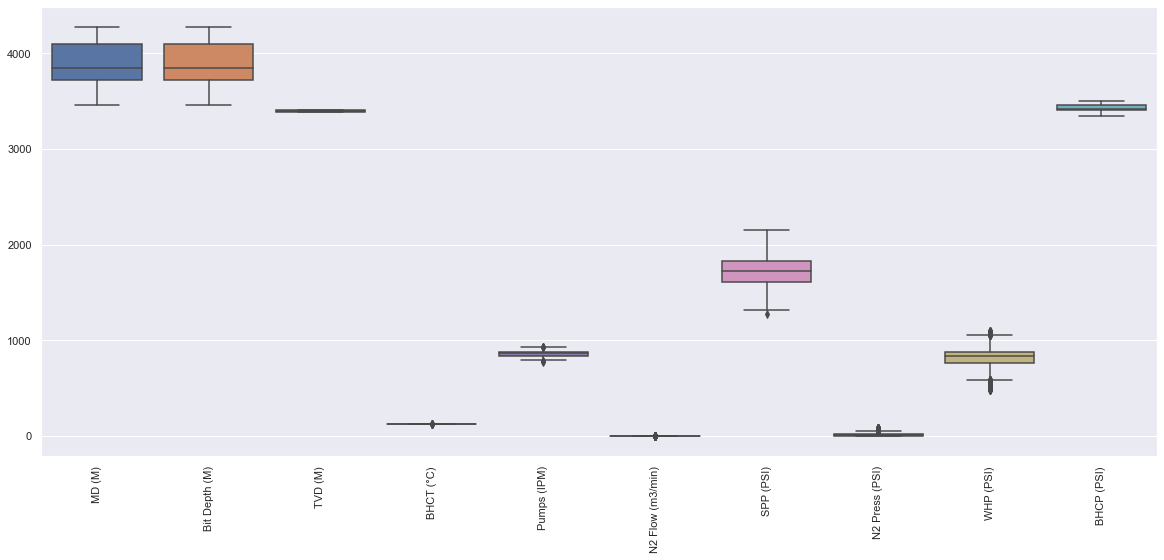

In [33]:
sns.set_theme(style="whitegrid",)
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

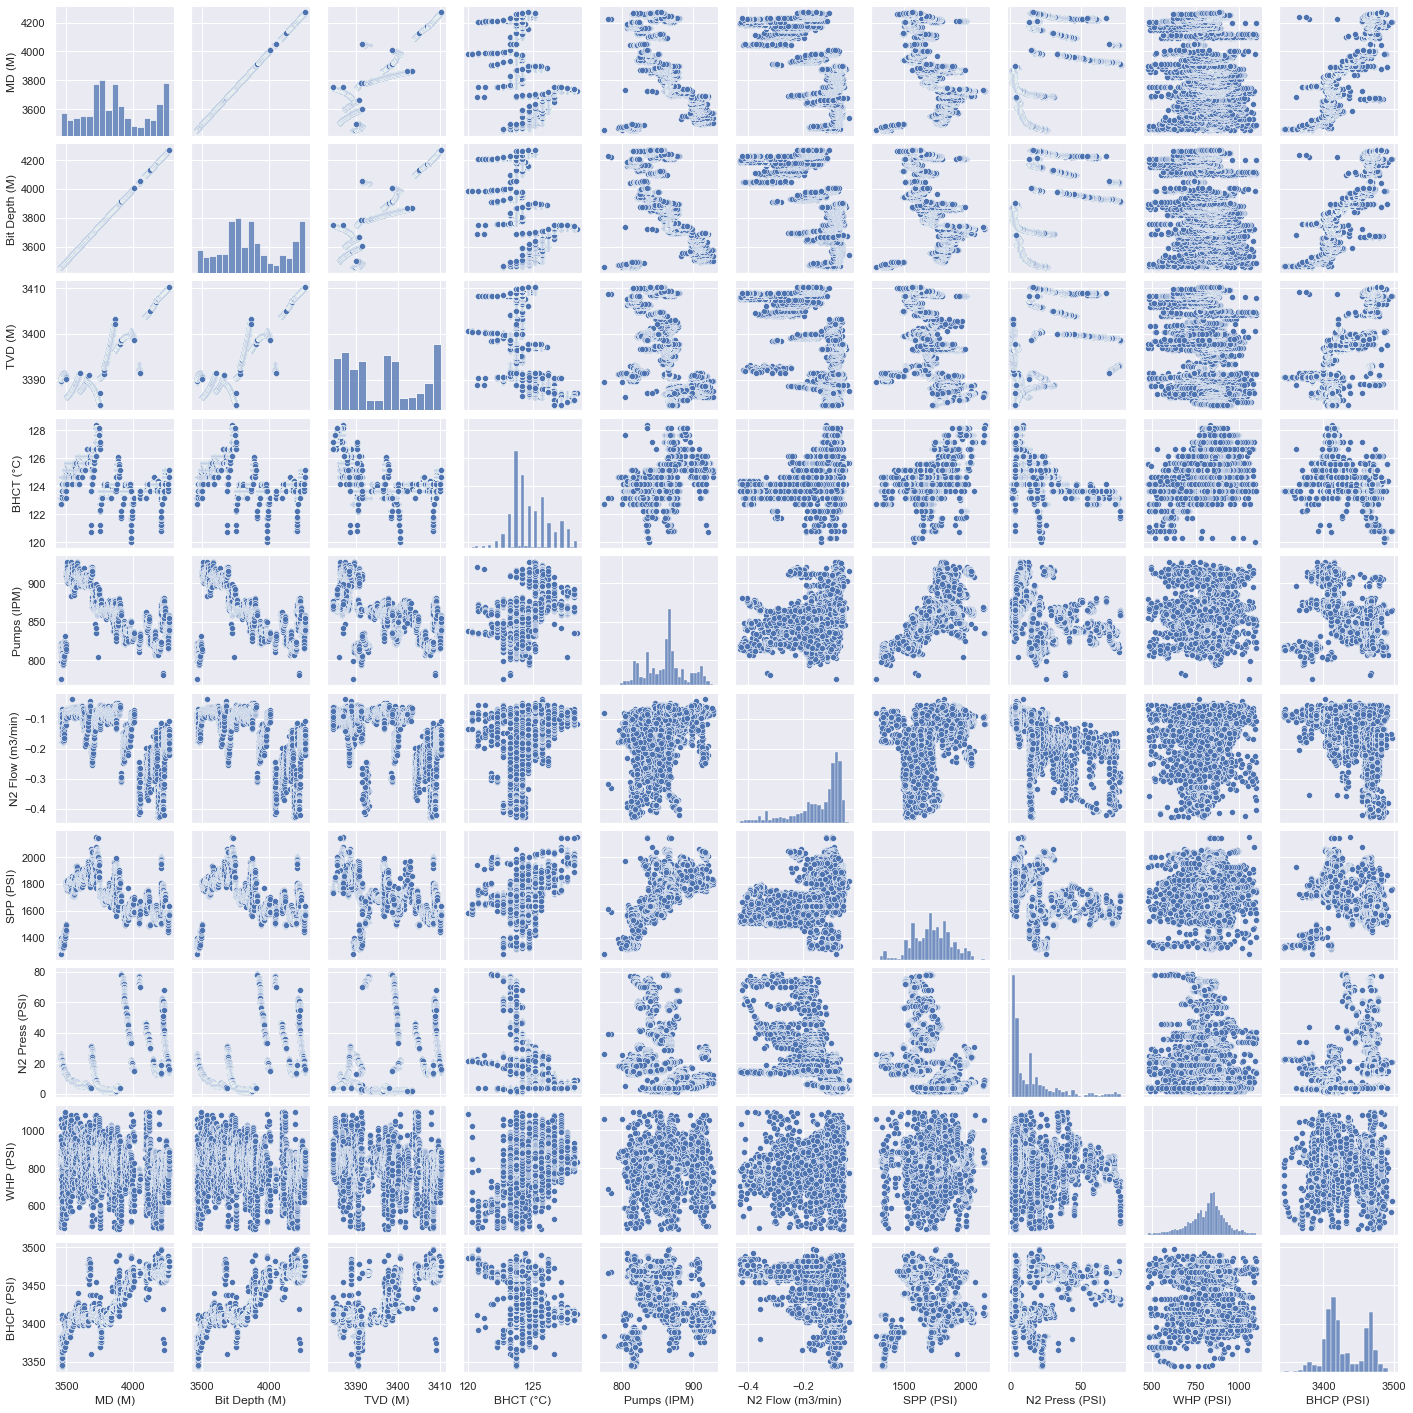

In [35]:
from matplotlib import pyplot
import matplotlib.pyplot as plt 
sns.set(font_scale=1)
sns.pairplot(df,height=2)
plt.show()

<AxesSubplot:>

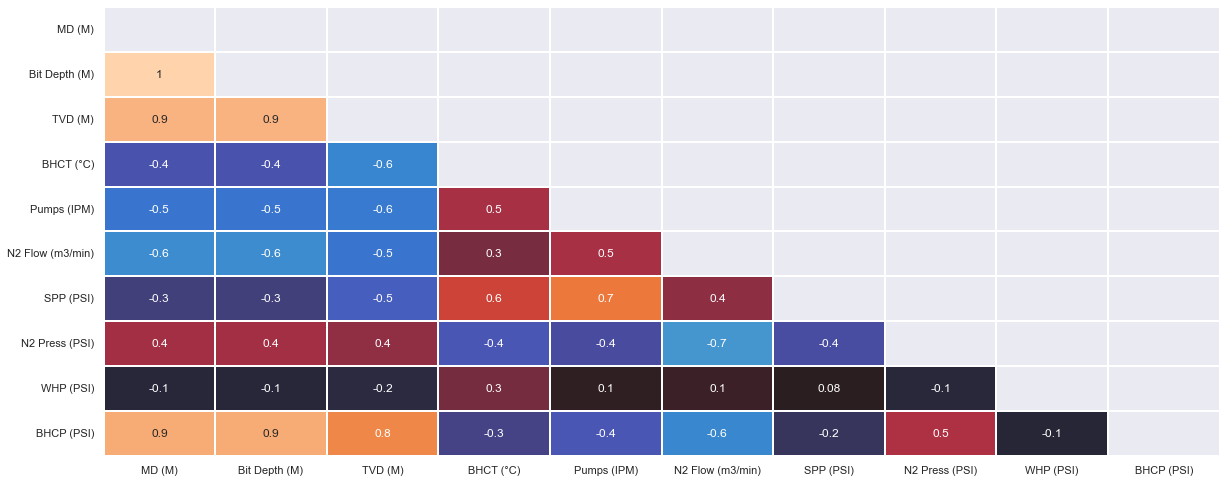

In [36]:
sns.set(font_scale=1)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(method ='pearson'), fmt=".1g", linewidths=2, vmin=-1, vmax=1, center=0,annot=True, mask=matrix, cbar=False)

<AxesSubplot:>

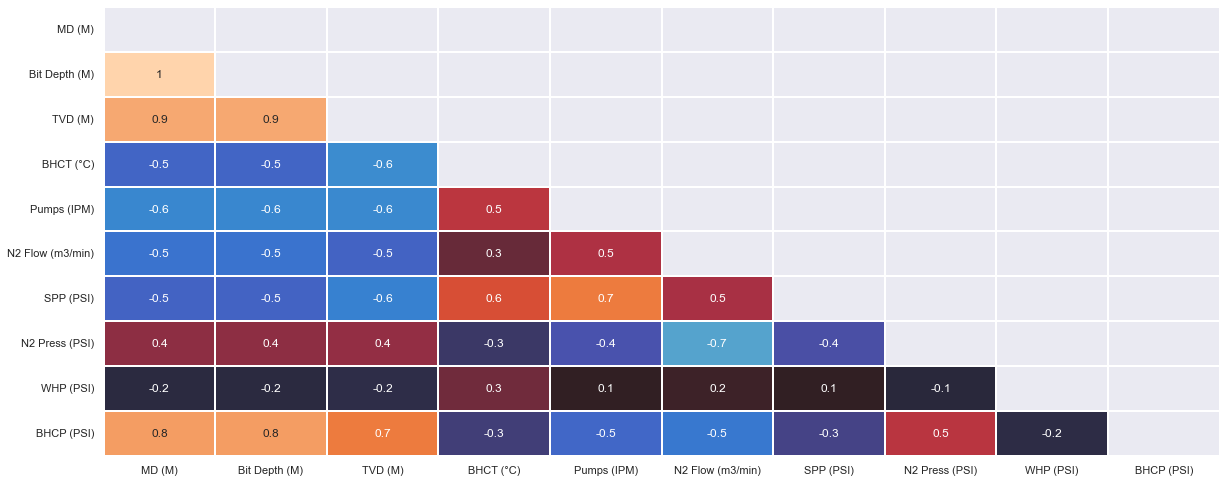

In [37]:
sns.set(font_scale=1)
matrix = np.triu(df.corr())
sns.heatmap(df.corr(method ='spearman'), fmt=".1g", linewidths=2, vmin=-1, vmax=1, center=0,annot=True, mask=matrix, cbar=False)

In [39]:
df.columns

Index(['MD (M)', 'Bit Depth (M)', 'TVD (M)', 'BHCT (°C)', 'Pumps (IPM)',
       'N2 Flow (m3/min)', 'SPP (PSI)', 'N2 Press (PSI)', 'WHP (PSI)',
       'BHCP (PSI)'],
      dtype='object')

In [43]:
mainp = pd.DataFrame(data=df,columns=['TVD (M)', 'BHCT (°C)', 'Pumps (IPM)','SPP (PSI)', 'N2 Press (PSI)', 'WHP (PSI)','BHCP (PSI)'])

In [44]:
mainp.describe()

,TVD (M),BHCT (°C),Pumps (IPM),SPP (PSI),N2 Press (PSI),WHP (PSI),BHCP (PSI)
count,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000,3740.000000
mean,3396.272514,124.757968,861.549788,1724.660428,16.652317,816.973054,3429.656965
std,8.239902,1.450759,28.337112,153.751766,18.501326,103.172555,29.315297
min,3384.548000,120.030000,775.200000,1275.555833,1.287702,478.098262,3344.000000
25%,3388.585000,123.699997,838.666667,1613.376917,3.513492,762.362480,3409.600000
50%,3396.626000,124.199997,865.133333,1724.312875,9.157509,831.622085,3420.800000
75%,3403.971000,125.690002,874.000000,1832.632833,21.717298,877.825108,3462.399902
max,3410.159000,128.415001,927.200000,2150.241167,78.421742,1096.866009,3497.600098


In [45]:
target = mainp['BHCP (PSI)']
features = mainp[['TVD (M)', 'BHCT (°C)', 'Pumps (IPM)','SPP (PSI)', 'N2 Press (PSI)', 'WHP (PSI)']].copy()

In [46]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target,train_size=0.8, test_size=0.2, random_state=0)

In [56]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressorModel = RandomForestRegressor()
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Predicted Value for Random Forest Regressor is :  [3474.03472209 3446.532      3404.944      3416.55466667 3463.45466667
 3413.952      3471.5786263  3413.38666667 3447.28       3461.75589965]


In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [57]:
print('mean_absolute_error Value for Random Forest Regressor is : '
      , mean_absolute_error(y_test, y_pred))
print('r2 score Value for Random Forest Regressor is : ' 
      , r2_score(y_test, y_pred))

mean_absolute_error Value for Random Forest Regressor is :  2.183813182410844
r2 score Value for Random Forest Regressor is :  0.9776466812701927


In [58]:
pred_y_df = pd.DataFrame({'Actual Value (psi)': y_test, 
 'Predicted_Value (psi)': y_pred, 'Difference (psi)': y_test-y_pred})
pred_y_df[0:200]


,Actual Value (psi),Predicted_Value (psi),Difference (psi)
5227,3473.600098,3474.034722,-0.434624
3678,3446.400000,3446.532000,-0.132000
1146,3401.600000,3404.944000,-3.344000
1945,3417.600000,3416.554667,1.045333
3786,3464.000000,3463.454667,0.545333
...,...,...,...
2668,3406.400000,3405.808000,0.592000
1895,3411.200000,3411.308000,-0.108000
4451,3476.800049,3471.673375,5.126674
3132,3427.200000,3426.173333,1.026667


In [65]:
# Definition of specific parameters for Random forest 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 30, num = 2)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [66]:
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter = 15, scoring='neg_mean_absolute_error',  cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

In [68]:
rf_random.fit(x_train, y_train);

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [75]:
best_random = rf_random.best_estimator_.fit(x_train, y_train)
predictions_best_random = best_random.predict(x_test)

print('Model score:', round(best_random.score(x_test, y_test),2))
print('Mean absolute error:', round(mean_absolute_error(y_test, predictions_best_random),2))
print('Root mean squared error:', round(sqrt(mean_squared_error(y_test, predictions_best_random)),2))
print('R2:', round(r2_score(y_test, predictions_best_random),2))

r2_rf=r2_score(y_test, predictions_best_random)
Mean_absolute_error_rf=mean_absolute_error(y_test, predictions_best_random)
Root_mean_squared_error_rf=sqrt(mean_squared_error(y_test, predictions_best_random))

Model score: 0.98
Mean absolute error: 2.2
Root mean squared error: 4.65
R2: 0.98
